# 1 Знакомство с  данными

Здесь будем подключать все библиотеки.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Подтягиваем данные.

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

## 1.1 Смотрим на файл `contract.csv`

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Проверим на дупликаты.

In [5]:
contract.duplicated().sum()

0

Смотрим уникальные значения.

In [6]:
contract.Type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [7]:
contract.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [8]:
contract.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<b>Данные понятны и осмотрены. Пустых полей и дупликатов нет. Вероятно потребуется предобработка данных для приведения к корректному типу.

## 1.2 Смотрим на файл `personal.csv`

In [9]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [10]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [11]:
personal.duplicated().sum()

0

In [12]:
personal.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [13]:
personal.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [14]:
personal.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [15]:
personal.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<b>Данные понятны и осмотрены. Пустых полей и дупликатов нет.

## 1.3 Смотрим на файл `internet.csv`

In [16]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


In [18]:
internet.duplicated().sum()

0

In [19]:
internet.InternetService.value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

In [20]:
internet.OnlineSecurity.value_counts()

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

In [21]:
internet.OnlineBackup.value_counts()

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

In [22]:
internet.DeviceProtection.value_counts()

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

In [23]:
internet.TechSupport.value_counts()

No     3473
Yes    2044
Name: TechSupport, dtype: int64

In [24]:
internet.StreamingTV.value_counts()

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

In [25]:
internet.StreamingMovies.value_counts()

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

<b>Данные понятны и осмотрены. Пустых полей и дупликатов нет. Все данные бинарные и несут информацию о подключении тех или иных услуг.

## 1.4 Смотрим на файл `phone.csv`

In [26]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [27]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


In [28]:
phone.duplicated().sum()

0

In [29]:
phone.MultipleLines.value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

<b>Данные понятны и осмотрены. Пустых полей и дупликатов нет. 

# 2 Исследовательский анализ данных

Проанализируем ежемесячную плату за услуги.

Text(0, 0.5, 'Количество клиентов')

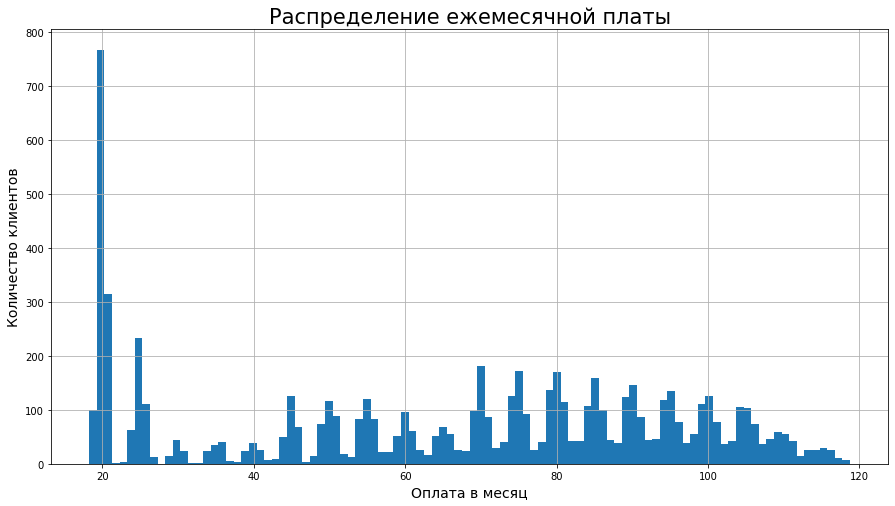

In [30]:
contract.MonthlyCharges.hist(figsize=(15,8), bins=100)
plt.title('Распределение ежемесячной платы', fontsize=21);
plt.xlabel('Оплата в месяц', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)

Посмотрим соотношение пользования услугами за интернет и телефонию.

In [31]:
round(internet.shape[0]/contract.shape[0], 2)

0.78

In [32]:
round(phone.shape[0]/contract.shape[0], 2)

0.9

<b>В основном ежемесечная плата за услуги у клиентов варьируется возле цифры 20, но также имеются и два небольших горба в районе 50 и 80.  
Примерно 3/4 клиентов имеют услугу интернет, а примерно в половине случаев из них пользуются и дополнительными услугами.   Телефонию используют 90% клиентов, дополнительные линии берут также примерно половина из них.

# 3 Предобработка данных

## 3.1 Подготовка данных

In [33]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [34]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [35]:
contract['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
20.05       8
           ..
677.05      1
274.35      1
224.05      1
70.35       1
2659.45     1
Name: TotalCharges, Length: 6531, dtype: int64

В 'TotalCharges' есть пробелы, будем избавляться от них.

Приведем 'MonthlyCharges'  на время к типу 'object'

In [36]:
contract.MonthlyCharges = contract.MonthlyCharges.astype('str')

In [37]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null object
TotalCharges        7043 non-null object
dtypes: object(8)
memory usage: 440.3+ KB


Найдем индексы строк с пустыми значениями в 'TotalCharges'.

In [38]:
i_list = contract[contract['TotalCharges'] == ' '].index

In [39]:
contract.loc[i_list]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.0,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.7,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Все имеют одну ту же дату подключения, т.е. это те клиенты, которые только составили контракт, поэтому общих платежей у них еще нет, скопируем значения из 'MonthlyCharges'.

In [40]:
contract['TotalCharges'][i_list] = contract['MonthlyCharges'][i_list]

Проверяем, что пустоты исчезли.

In [41]:
contract.loc[contract[contract['TotalCharges'] == ' '].index]['TotalCharges']

Series([], Name: TotalCharges, dtype: object)

Возвращаем тип данных к числовому.

In [42]:
contract.MonthlyCharges = contract.MonthlyCharges.astype('float')

In [43]:
contract.TotalCharges = contract.TotalCharges.astype('float')

In [44]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


In [45]:
contract.loc[i_list]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,52.55
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,20.25
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,80.85
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,25.75
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,56.05
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,19.85
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,25.35
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,20.00
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,19.70
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,73.35


С пустотами разобрались, идем дальше.

Пишем функцию для добавления целевого признака.

In [46]:
def create_target(row):
    if row == 'No':
        return 0
    else:
        return 1

In [47]:
contract['Exited'] = contract['EndDate'].apply(create_target)

Убеждаемся, что нет дат 2020-02-01 00:00:00.

In [48]:
contract[contract['EndDate'] == '2020-02-01 00:00:00']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited


Пишем функцию для замены значения No на дату, для последующего подсчета длительности контракта.

In [49]:
def no_to_date(row):
    if row == 'No':
        return '2020-02-01 00:00:00'
    else: return row

In [50]:
contract['EndDate'] = contract['EndDate'].apply(no_to_date)

In [51]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited
0,7590-VHVEG,2020-01-01,2020-02-01 00:00:00,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01 00:00:00,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01 00:00:00,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


Приводим 'BeginDate' и 'EndDate' к временному типу.

In [52]:
contract.BeginDate = pd.to_datetime(contract.BeginDate, format='%Y-%m-%d')
contract.EndDate = pd.to_datetime(contract.EndDate, format='%Y-%m-%d')

In [53]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [54]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Exited              7043 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


Добавляем новый признак LTV - Life Time Value, подсчитав из длительности контракта.

In [55]:
contract['LTV_days'] = pd.DatetimeIndex(contract['EndDate']) - pd.DatetimeIndex(contract['BeginDate'])

In [56]:
contract['LTV_days'].head()

0     31 days
1   1036 days
2     61 days
3   1371 days
4     61 days
Name: LTV_days, dtype: timedelta64[ns]

Переводим в численные дни.

In [57]:
contract['LTV_days'] = contract['LTV_days'].dt.total_seconds() / (3600 * 24)

In [58]:
contract['LTV_days'].head()

0      31.0
1    1036.0
2      61.0
3    1371.0
4      61.0
Name: LTV_days, dtype: float64

## 3.1 Соединяем данные

In [59]:
data_concat = pd.merge(contract, personal, on='customerID')

In [60]:
data_concat = pd.merge(data_concat, internet, on='customerID', how='left')

In [61]:
data_concat = pd.merge(data_concat, phone, on='customerID', how='left')

In [62]:
data_concat.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Exited                 0
LTV_days               0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

Заменяем пустые значения на No

In [63]:
data_concat = data_concat.fillna('No')

In [64]:
data_concat.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Exited              0
LTV_days            0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [65]:
pd.set_option('display.max_columns', 50)

In [66]:
data_concat.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,LTV_days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31.0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036.0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61.0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371.0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61.0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


### Анализ количественных признаков

Посмотрим на корреляцию количественных признаков, проверив нет ли проблем с мультиколлинеарностью.

In [67]:
data_concat[['MonthlyCharges', 'TotalCharges', 'LTV_days']].corr()

,MonthlyCharges,TotalCharges,LTV_days
MonthlyCharges,1.000000,0.651182,0.247754
TotalCharges,0.651182,1.000000,0.826095
LTV_days,0.247754,0.826095,1.000000


Признак TotalCharges имеет сильную корреляцию с другими признаками, поэтому его дропаем. MonthlyCharges тоже имеет небольшую корреляцию. На этапе обучения будет проведена проверка с одним параметром LTV_days, и с двумя MonthlyCharges и LTV_days, посмотрим с чем будут лучше результаты, то и оставим.

In [68]:
data_concat.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Exited', 'LTV_days',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines'],
      dtype='object')

Дропаем логически не нужные колонки 'customerID', 'BeginDate', 'EndDate'. Анализ на этапе обучения показал, что метрика лучше с одним количественным параметром LTV, поэтому оставляем только его.

In [69]:
#data_concat = data_concat.drop(['customerID', 'BeginDate', 'EndDate', 'PaperlessBilling', 'PaymentMethod'], axis=1)
data_concat = data_concat.drop(['customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges'], axis=1)
#data_concat = data_concat.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges'], axis=1)

In [70]:
data_concat.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'Exited', 'LTV_days',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines'],
      dtype='object')

Сформируем сразу категориальные признаки.

In [71]:
cat_features = ['Type', 'gender', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PaperlessBilling', 'PaymentMethod']

Кодируем их через метод One-Hot Encoding.

In [72]:
data_concat_ohe = pd.get_dummies(data_concat[cat_features], drop_first=True)

In [73]:
data_concat_ohe.head()

,Type_One year,Type_Two year,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


Заменяем старые признаки на новые закодированные.

In [74]:
data_concat_ohe_full = pd.concat([data_concat.drop(cat_features, axis=1), data_concat_ohe], axis=1, sort=False)

In [75]:
data_concat_ohe_full

,Exited,LTV_days,SeniorCitizen,Type_One year,Type_Two year,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,31.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,0,1036.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,1,61.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
3,0,1371.0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,1,61.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,730.0,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,0,0,1
7039,0,2191.0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0
7040,0,337.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0
7041,1,123.0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1


# 4 Обучение моделей

Делим признаки на обучающую, валидационную и тестовую как 60/20/20.

In [76]:
target = data_concat_ohe_full['Exited']
features = data_concat_ohe_full.drop('Exited', axis=1)
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

## 4.1 Модель LogisticRegression

In [77]:
%%time

auc_roc_best = 0
c_best = 0
max_iter_best = 0
time_best = 0
accuracy_best = 0

for c in [0.001, 0.01, 0.1, 1.0, 10.0]:
    for max_iter in range(10, 100, 10):
        begin_time = time.time()
        print('--------------')
        print('C=', c, '|', 'max_iter', max_iter)
        model = LogisticRegression(random_state=12345, C=c, class_weight='balanced', max_iter=max_iter, solver='liblinear')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)

        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        accuracy = accuracy_score(target_valid, predicted_valid)
        
        total_time = round((time.time() - begin_time), 1)
        print('AUC-ROC=', auc_roc)
        print('Accuracy=', accuracy)
        print('Total:', total_time,'s')
        
        if auc_roc > auc_roc_best:
            auc_roc_best = auc_roc
            c_best = c
            max_iter_best = max_iter
            time_best = total_time
            accuracy_best = accuracy
            
print('---------------------------------')
print('Лучшие параметры при C:', c_best, 'max_iter:', max_iter_best, 'Время:', time_best, 's')
print('AUC-ROC:', auc_roc_best)
print('Accuracy:', accuracy_best)

--------------
C= 0.001 | max_iter 10
AUC-ROC= 0.8349561830574488
Accuracy= 0.7672107877927609
Total: 0.0 s
--------------
C= 0.001 | max_iter 20


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AUC-ROC= 0.8351040238176564
Accuracy= 0.7679205110007097
Total: 0.2 s
--------------
C= 0.001 | max_iter 30
AUC-ROC= 0.8351040238176564
Accuracy= 0.7679205110007097
Total: 0.2 s
--------------
C= 0.001 | max_iter 40
AUC-ROC= 0.8351040238176564
Accuracy= 0.7679205110007097
Total: 0.2 s
--------------
C= 0.001 | max_iter 50
AUC-ROC= 0.8351040238176564
Accuracy= 0.7679205110007097
Total: 0.1 s
--------------
C= 0.001 | max_iter 60
AUC-ROC= 0.8351040238176564
Accuracy= 0.7679205110007097
Total: 0.1 s
--------------
C= 0.001 | max_iter 70
AUC-ROC= 0.8351040238176564
Accuracy= 0.7679205110007097
Total: 0.2 s
--------------
C= 0.001 | max_iter 80
AUC-ROC= 0.8351040238176564
Accuracy= 0.7679205110007097
Total: 0.1 s
--------------
C= 0.001 | max_iter 90
AUC-ROC= 0.8351040238176564
Accuracy= 0.7679205110007097
Total: 0.2 s
--------------
C= 0.01 | max_iter 10
AUC-ROC= 0.8473493171286266
Accuracy= 0.7608232789212207
Total: 0.2 s
--------------
C= 0.01 | max_iter 20


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AUC-ROC= 0.8475353925681979
Accuracy= 0.758694109297374
Total: 0.2 s
--------------
C= 0.01 | max_iter 30
AUC-ROC= 0.8475353925681979
Accuracy= 0.758694109297374
Total: 0.2 s
--------------
C= 0.01 | max_iter 40
AUC-ROC= 0.8475353925681979
Accuracy= 0.758694109297374
Total: 0.2 s
--------------
C= 0.01 | max_iter 50
AUC-ROC= 0.8475353925681979
Accuracy= 0.758694109297374
Total: 0.2 s
--------------
C= 0.01 | max_iter 60
AUC-ROC= 0.8475353925681979
Accuracy= 0.758694109297374
Total: 0.2 s
--------------
C= 0.01 | max_iter 70
AUC-ROC= 0.8475353925681979
Accuracy= 0.758694109297374
Total: 0.2 s
--------------
C= 0.01 | max_iter 80
AUC-ROC= 0.8475353925681979
Accuracy= 0.758694109297374
Total: 0.2 s
--------------
C= 0.01 | max_iter 90
AUC-ROC= 0.8475353925681979
Accuracy= 0.758694109297374
Total: 0.1 s
--------------
C= 0.1 | max_iter 10


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AUC-ROC= 0.844326228480248
Accuracy= 0.7558552164655784
Total: 0.2 s
--------------
C= 0.1 | max_iter 20
AUC-ROC= 0.8503010343755256
Accuracy= 0.7579843860894251
Total: 0.2 s
--------------
C= 0.1 | max_iter 30
AUC-ROC= 0.8503010343755256
Accuracy= 0.7579843860894251
Total: 0.2 s
--------------
C= 0.1 | max_iter 40
AUC-ROC= 0.8503010343755256
Accuracy= 0.7579843860894251
Total: 0.3 s
--------------
C= 0.1 | max_iter 50
AUC-ROC= 0.8503010343755256
Accuracy= 0.7579843860894251
Total: 0.2 s
--------------
C= 0.1 | max_iter 60
AUC-ROC= 0.8503010343755256
Accuracy= 0.7579843860894251
Total: 0.2 s
--------------
C= 0.1 | max_iter 70
AUC-ROC= 0.8503010343755256
Accuracy= 0.7579843860894251
Total: 0.2 s
--------------
C= 0.1 | max_iter 80
AUC-ROC= 0.8503010343755256
Accuracy= 0.7579843860894251
Total: 0.3 s
--------------
C= 0.1 | max_iter 90
AUC-ROC= 0.8503010343755256
Accuracy= 0.7579843860894251
Total: 0.2 s
--------------
C= 1.0 | max_iter 10


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AUC-ROC= 0.8442879938008842
Accuracy= 0.7551454932576295
Total: 0.1 s
--------------
C= 1.0 | max_iter 20
AUC-ROC= 0.8505227955158369
Accuracy= 0.7551454932576295
Total: 0.2 s
--------------
C= 1.0 | max_iter 30
AUC-ROC= 0.8505227955158369
Accuracy= 0.7551454932576295
Total: 0.2 s
--------------
C= 1.0 | max_iter 40
AUC-ROC= 0.8505227955158369
Accuracy= 0.7551454932576295
Total: 0.2 s
--------------
C= 1.0 | max_iter 50
AUC-ROC= 0.8505227955158369
Accuracy= 0.7551454932576295
Total: 0.2 s
--------------
C= 1.0 | max_iter 60
AUC-ROC= 0.8505227955158369
Accuracy= 0.7551454932576295
Total: 0.2 s
--------------
C= 1.0 | max_iter 70
AUC-ROC= 0.8505227955158369
Accuracy= 0.7551454932576295
Total: 0.2 s
--------------
C= 1.0 | max_iter 80
AUC-ROC= 0.8505227955158369
Accuracy= 0.7551454932576295
Total: 0.2 s
--------------
C= 1.0 | max_iter 90
AUC-ROC= 0.8505227955158369
Accuracy= 0.7551454932576295
Total: 0.3 s
--------------
C= 10.0 | max_iter 10
AUC-ROC= 0.8442828958436354
Accuracy= 0.75514

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AUC-ROC= 0.85049475675097
Accuracy= 0.7558552164655784
Total: 0.2 s
--------------
C= 10.0 | max_iter 30
AUC-ROC= 0.85049475675097
Accuracy= 0.7558552164655784
Total: 0.2 s
--------------
C= 10.0 | max_iter 40
AUC-ROC= 0.85049475675097
Accuracy= 0.7558552164655784
Total: 0.2 s
--------------
C= 10.0 | max_iter 50
AUC-ROC= 0.85049475675097
Accuracy= 0.7558552164655784
Total: 0.1 s
--------------
C= 10.0 | max_iter 60
AUC-ROC= 0.85049475675097
Accuracy= 0.7558552164655784
Total: 0.2 s
--------------
C= 10.0 | max_iter 70
AUC-ROC= 0.85049475675097
Accuracy= 0.7558552164655784
Total: 0.2 s
--------------
C= 10.0 | max_iter 80
AUC-ROC= 0.85049475675097
Accuracy= 0.7558552164655784
Total: 0.1 s
--------------
C= 10.0 | max_iter 90
AUC-ROC= 0.85049475675097
Accuracy= 0.7558552164655784
Total: 0.2 s
---------------------------------
Лучшие параметры при C: 1.0 max_iter: 20 Время: 0.2 s
AUC-ROC: 0.8505227955158369
Accuracy: 0.7551454932576295
CPU times: user 4.28 s, sys: 4.41 s, total: 8.7 s
Wa

Лучшие параметры при C: 1.0 max_iter: 20 Время: 0.2 s
AUC-ROC: 0.8505227955158369
Accuracy: 0.7551454932576295

<b>Фиксируем значение для сравнения с другими моделями в будущем:   
Модель LogisticRegression   
AUC-ROC: 0.8476233323307352   
Accuracy: 0.7572746628814763   

## 4.2 Модель DecisionTreeClassifier

In [78]:
%%time

auc_roc_best = 0
samples_split_best = 0
samples_leaf_best = 0
time_best = 0
accuracy_best = 0

for samples_split in range(2, 150, 2):
    for samples_leaf in range(1, 40, 1):
        begin_time = time.time()
        print('--------------')
        print('samples_split=', samples_split, '|', 'samples_leaf=', samples_leaf) 
        model = DecisionTreeClassifier(random_state=12345, min_samples_split=samples_split,
                                       min_samples_leaf=samples_leaf)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)

        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        accuracy = accuracy_score(target_valid, predicted_valid)
        
        total_time = round((time.time() - begin_time), 1)
        print('AUC-ROC=', auc_roc)
        print('Accuracy=', accuracy)
        print('Total:', total_time,'s')
        
        if auc_roc > auc_roc_best:
            auc_roc_best = auc_roc
            samples_split_best = samples_split
            samples_leaf_best = samples_leaf
            time_best = total_time
            accuracy_best = accuracy

print('---------------------------------')
print("Лучшее AUC-ROC = {:.4f} при samples_split = {:.0f} и samples_leaf = {:.0f}, Accuracy = {:.4f}"
                                                    .format(auc_roc_best, samples_split_best,
                                                            samples_leaf_best, accuracy_best))

--------------
samples_split= 2 | samples_leaf= 1
AUC-ROC= 0.7382836197535647
Accuracy= 0.7927608232789212
Total: 0.1 s
--------------
samples_split= 2 | samples_leaf= 2
AUC-ROC= 0.7651065218167081
Accuracy= 0.794889992902768
Total: 0.0 s
--------------
samples_split= 2 | samples_leaf= 3
AUC-ROC= 0.7747760722278583
Accuracy= 0.7885024840312278
Total: 0.0 s
--------------
samples_split= 2 | samples_leaf= 4
AUC-ROC= 0.7914973720030383
Accuracy= 0.7955997161107168
Total: 0.0 s
--------------
samples_split= 2 | samples_leaf= 5
AUC-ROC= 0.8046857874049868
Accuracy= 0.7856635911994322
Total: 0.0 s
--------------
samples_split= 2 | samples_leaf= 6
AUC-ROC= 0.811155095153372
Accuracy= 0.7970191625266146
Total: 0.0 s
--------------
samples_split= 2 | samples_leaf= 7
AUC-ROC= 0.8092025775271848
Accuracy= 0.794180269694819
Total: 0.0 s
--------------
samples_split= 2 | samples_leaf= 8
AUC-ROC= 0.811520873585954
Accuracy= 0.7955997161107168
Total: 0.0 s
--------------
samples_split= 2 | samples_le

Лучшее AUC-ROC = 0.8637 при samples_split = 80 и samples_leaf = 1, Accuracy = 0.8148
CPU times: user 54.6 s, sys: 2.49 s, total: 57.1 s

<b>Фиксируем значение для сравнения с другими моделями в будущем:   
Модель DecisionTreeClassifier   
AUC-ROC = 0.8554  
Accuracy = 0.8091

## 4.3 Модель RandomForestClassifier

In [79]:
%%time

auc_roc_best = 0
estim_best = 0 
depth_best = 0
time_best = 0
accuracy_best = 0

for estim in range(10, 151, 20):
    for depth in range(1, 20):
        begin_time = time.time()
        print('--------------')
        print('estim=', estim, '|', 'depth=', depth) 
        model = RandomForestClassifier(n_estimators=estim, random_state=12345, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)

        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        accuracy = accuracy_score(target_valid, predicted_valid)
        
        total_time = round((time.time() - begin_time), 1)
        print('AUC-ROC=', auc_roc)
        print('Accuracy=', accuracy)
        print('Total:', total_time,'s')
        
        if auc_roc > auc_roc_best:
            auc_roc_best = auc_roc
            estim_best = estim
            depth_best = depth
            time_best = total_time
            accuracy_best = accuracy

print('---------------------------------')
print("Лучшее AUC-ROC = {:.4f} при estim = {:.0f} и depth = {:.0f}, Accuracy = {:.4f}"
                                                    .format(auc_roc_best, estim_best,
                                                            depth_best, accuracy_best))

--------------
estim= 10 | depth= 1
AUC-ROC= 0.8124487018051867
Accuracy= 0.7395315826827538
Total: 0.0 s
--------------
estim= 10 | depth= 2
AUC-ROC= 0.8130846719719408
Accuracy= 0.7352732434350603
Total: 0.1 s
--------------
estim= 10 | depth= 3
AUC-ROC= 0.839146703915741
Accuracy= 0.7501774308019872
Total: 0.0 s
--------------
estim= 10 | depth= 4
AUC-ROC= 0.8502742700999709
Accuracy= 0.7615330021291696
Total: 0.1 s
--------------
estim= 10 | depth= 5
AUC-ROC= 0.8562605463990578
Accuracy= 0.7608232789212207
Total: 0.1 s
--------------
estim= 10 | depth= 6
AUC-ROC= 0.850784065824824
Accuracy= 0.7629524485450674
Total: 0.1 s
--------------
estim= 10 | depth= 7
AUC-ROC= 0.8580091457353037
Accuracy= 0.7792760823278921
Total: 0.1 s
--------------
estim= 10 | depth= 8
AUC-ROC= 0.8570647491550136
Accuracy= 0.7735982966643009
Total: 0.1 s
--------------
estim= 10 | depth= 9
AUC-ROC= 0.856493777943178
Accuracy= 0.78708303761533
Total: 0.1 s
--------------
estim= 10 | depth= 10
AUC-ROC= 0.844

Лучшее AUC-ROC = 0.8654 при estim = 70 и depth = 9, Accuracy = 0.7821
CPU times: user 57.6 s, sys: 376 ms, total: 57.9 s

<b>Фиксируем значение для сравнения с другими моделями в будущем:   
Модель RandomForestClassifier   
AUC-ROC = 0.8609   
Accuracy = 0.7729

## 4.4 Модель LightGBM

In [80]:
%%time

depth_best = 0
learning_rate_best = 0
time_best = 0
auc_roc_best = 0
accuracy_best = 0
time_best = 0
#[0.4, 0.5]
for learning_rate in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1]:
    for depth in [5, 8, 10, 14, 16, 18, 20]:
        begin_time = time.time()
        print('--------------')
        print('learning_rate', learning_rate, '|', 'depth', depth)
        model = LGBMClassifier(objective='binary', num_iterations=50, max_depth=depth,
                              learning_rate=learning_rate, random_state=12345)
        model.fit(features_train, target_train, eval_set=[(features_valid, target_valid)],
                  eval_metric='logloss', verbose=10) 
        predicted_valid = model.predict(features_valid)
        
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]       
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        accuracy = accuracy_score(target_valid, predicted_valid)
        total_time = round((time.time() - begin_time), 1)
        
        print('Total:', total_time,'s')
        print('AUC-ROC=', auc_roc)
        print('Accuracy=', accuracy)
        
        if auc_roc > auc_roc_best:
            auc_roc_best = auc_roc
            depth_best = depth
            learning_rate_best = learning_rate
            accuracy_best = accuracy
            time_best = total_time

print('---------------------------------')
print('Лучшие параметры при learning_rate:', learning_rate_best, 'depth:', depth_best, 'Время:', time_best, 's')
print('AUC-ROC =', auc_roc_best)
print('Accuracy =', accuracy_best)

--------------
learning_rate 0.1 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.433179
[20]	valid_0's binary_logloss: 0.397156
[30]	valid_0's binary_logloss: 0.385126
[40]	valid_0's binary_logloss: 0.37973
[50]	valid_0's binary_logloss: 0.378079
Total: 91.7 s
AUC-ROC= 0.873415172540363
Accuracy= 0.8190205819730305
--------------
learning_rate 0.1 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.422375
[20]	valid_0's binary_logloss: 0.387641
[30]	valid_0's binary_logloss: 0.379094
[40]	valid_0's binary_logloss: 0.3681
[50]	valid_0's binary_logloss: 0.364464
Total: 79.2 s
AUC-ROC= 0.8818841540194844
Accuracy= 0.829666430092264
--------------
learning_rate 0.1 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.423967
[20]	valid_0's binary_logloss: 0.389342
[30]	valid_0's binary_logloss: 0.374519
[40]	valid_0's binary_logloss: 0.365224
[50]	valid_0's binary_logloss: 0.361151
Total: 61.4 s
AUC-ROC= 0.8833663850894947
Accuracy= 0.8424414478353442
--------------
learning_rate 0.1 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.424011
[20]	valid_0's binary_logloss: 0.38967
[30]	valid_0's binary_logloss: 0.373567
[40]	valid_0's binary_logloss: 0.367522
[50]	valid_0's binary_logloss: 0.360825
Total: 45.1 s
AUC-ROC= 0.8840176491279943
Accuracy= 0.8381831085876508
--------------
learning_rate 0.1 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.424011
[20]	valid_0's binary_logloss: 0.386822
[30]	valid_0's binary_logloss: 0.370304
[40]	valid_0's binary_logloss: 0.36421
[50]	valid_0's binary_logloss: 0.358297
Total: 13.7 s
AUC-ROC= 0.8861078115998918
Accuracy= 0.8396025550035486
--------------
learning_rate 0.1 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.424011
[20]	valid_0's binary_logloss: 0.386822
[30]	valid_0's binary_logloss: 0.369412
[40]	valid_0's binary_logloss: 0.365221
[50]	valid_0's binary_logloss: 0.35905
Total: 26.1 s
AUC-ROC= 0.8857687974428645
Accuracy= 0.8396025550035486
--------------
learning_rate 0.1 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.424011
[20]	valid_0's binary_logloss: 0.386822
[30]	valid_0's binary_logloss: 0.369653
[40]	valid_0's binary_logloss: 0.3668
[50]	valid_0's binary_logloss: 0.358842
Total: 24.3 s
AUC-ROC= 0.8854807628583227
Accuracy= 0.8360539389638041
--------------
learning_rate 0.2 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.399988
[20]	valid_0's binary_logloss: 0.386661
[30]	valid_0's binary_logloss: 0.374145
[40]	valid_0's binary_logloss: 0.368235
[50]	valid_0's binary_logloss: 0.362493
Total: 15.4 s
AUC-ROC= 0.8834122667047315
Accuracy= 0.8346344925479063
--------------
learning_rate 0.2 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.387894
[20]	valid_0's binary_logloss: 0.366318
[30]	valid_0's binary_logloss: 0.359992
[40]	valid_0's binary_logloss: 0.352157
[50]	valid_0's binary_logloss: 0.34218
Total: 34.2 s
AUC-ROC= 0.8986602568350861
Accuracy= 0.8466997870830376
--------------
learning_rate 0.2 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.384118
[20]	valid_0's binary_logloss: 0.365721
[30]	valid_0's binary_logloss: 0.358805
[40]	valid_0's binary_logloss: 0.351156
[50]	valid_0's binary_logloss: 0.341365
Total: 28.8 s
AUC-ROC= 0.8984843773100117
Accuracy= 0.8530872959545777
--------------
learning_rate 0.2 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.386165
[20]	valid_0's binary_logloss: 0.369093
[30]	valid_0's binary_logloss: 0.35688
[40]	valid_0's binary_logloss: 0.34906
[50]	valid_0's binary_logloss: 0.341036
Total: 36.1 s
AUC-ROC= 0.8983327130818681
Accuracy= 0.850958126330731
--------------
learning_rate 0.2 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.386165
[20]	valid_0's binary_logloss: 0.365736
[30]	valid_0's binary_logloss: 0.353791
[40]	valid_0's binary_logloss: 0.345691
[50]	valid_0's binary_logloss: 0.339547
Total: 27.5 s
AUC-ROC= 0.8998136696625663
Accuracy= 0.8495386799148332
--------------
learning_rate 0.2 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.386165
[20]	valid_0's binary_logloss: 0.36323
[30]	valid_0's binary_logloss: 0.349295
[40]	valid_0's binary_logloss: 0.343837
[50]	valid_0's binary_logloss: 0.337478
Total: 18.9 s
AUC-ROC= 0.899753768664896
Accuracy= 0.8488289567068843
--------------
learning_rate 0.2 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.386165
[20]	valid_0's binary_logloss: 0.368991
[30]	valid_0's binary_logloss: 0.349778
[40]	valid_0's binary_logloss: 0.33768
[50]	valid_0's binary_logloss: 0.333653
Total: 24.7 s
AUC-ROC= 0.903356749950295
Accuracy= 0.8474095102909865
--------------
learning_rate 0.3 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.383368
[20]	valid_0's binary_logloss: 0.37546
[30]	valid_0's binary_logloss: 0.362203
[40]	valid_0's binary_logloss: 0.353737
[50]	valid_0's binary_logloss: 0.34711
Total: 8.9 s
AUC-ROC= 0.8948100246231335
Accuracy= 0.8417317246273953
--------------
learning_rate 0.3 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.370532
[20]	valid_0's binary_logloss: 0.358019
[30]	valid_0's binary_logloss: 0.343544
[40]	valid_0's binary_logloss: 0.334891
[50]	valid_0's binary_logloss: 0.336691
Total: 22.4 s
AUC-ROC= 0.9019178515168972
Accuracy= 0.8559261887863733
--------------
learning_rate 0.3 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.379693
[20]	valid_0's binary_logloss: 0.350074
[30]	valid_0's binary_logloss: 0.342746
[40]	valid_0's binary_logloss: 0.33623
[50]	valid_0's binary_logloss: 0.338104
Total: 29.7 s
AUC-ROC= 0.9009390437251793
Accuracy= 0.8559261887863733
--------------
learning_rate 0.3 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.374028
[20]	valid_0's binary_logloss: 0.350847
[30]	valid_0's binary_logloss: 0.34244
[40]	valid_0's binary_logloss: 0.338729
[50]	valid_0's binary_logloss: 0.336597
Total: 21.1 s
AUC-ROC= 0.904251441447412
Accuracy= 0.8516678495386799
--------------
learning_rate 0.3 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.376411
[20]	valid_0's binary_logloss: 0.348607
[30]	valid_0's binary_logloss: 0.348567
[40]	valid_0's binary_logloss: 0.342902
[50]	valid_0's binary_logloss: 0.343823
Total: 17.3 s
AUC-ROC= 0.8991904443889334
Accuracy= 0.8466997870830376
--------------
learning_rate 0.3 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.374876
[20]	valid_0's binary_logloss: 0.352265
[30]	valid_0's binary_logloss: 0.342225
[40]	valid_0's binary_logloss: 0.341078
[50]	valid_0's binary_logloss: 0.33869
Total: 39.4 s
AUC-ROC= 0.9029820500925279
Accuracy= 0.8559261887863733
--------------
learning_rate 0.3 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.374876
[20]	valid_0's binary_logloss: 0.352265
[30]	valid_0's binary_logloss: 0.342225
[40]	valid_0's binary_logloss: 0.341078
[50]	valid_0's binary_logloss: 0.33869
Total: 22.6 s
AUC-ROC= 0.9029820500925279
Accuracy= 0.8559261887863733
--------------
learning_rate 0.4 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.391314
[20]	valid_0's binary_logloss: 0.370222
[30]	valid_0's binary_logloss: 0.355606
[40]	valid_0's binary_logloss: 0.344497
[50]	valid_0's binary_logloss: 0.339913
Total: 21.4 s
AUC-ROC= 0.9012398232028426
Accuracy= 0.850958126330731
--------------
learning_rate 0.4 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.37182
[20]	valid_0's binary_logloss: 0.36178
[30]	valid_0's binary_logloss: 0.351697
[40]	valid_0's binary_logloss: 0.354237
[50]	valid_0's binary_logloss: 0.362221
Total: 33.2 s
AUC-ROC= 0.8957187355026841
Accuracy= 0.8459900638750887
--------------
learning_rate 0.4 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.36948
[20]	valid_0's binary_logloss: 0.347326
[30]	valid_0's binary_logloss: 0.337692
[40]	valid_0's binary_logloss: 0.335394
[50]	valid_0's binary_logloss: 0.339768
Total: 24.3 s
AUC-ROC= 0.9060306285271491
Accuracy= 0.8601845280340668
--------------
learning_rate 0.4 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.367467
[20]	valid_0's binary_logloss: 0.34477
[30]	valid_0's binary_logloss: 0.350591
[40]	valid_0's binary_logloss: 0.342938
[50]	valid_0's binary_logloss: 0.345226
Total: 24.0 s
AUC-ROC= 0.9027590144629049
Accuracy= 0.8445706174591909
--------------
learning_rate 0.4 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.372428
[20]	valid_0's binary_logloss: 0.355077
[30]	valid_0's binary_logloss: 0.347514
[40]	valid_0's binary_logloss: 0.346158
[50]	valid_0's binary_logloss: 0.349142
Total: 17.8 s
AUC-ROC= 0.9015699159346849
Accuracy= 0.8481192334989354
--------------
learning_rate 0.4 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.374355
[20]	valid_0's binary_logloss: 0.350077
[30]	valid_0's binary_logloss: 0.343194
[40]	valid_0's binary_logloss: 0.351113
[50]	valid_0's binary_logloss: 0.35424
Total: 34.6 s
AUC-ROC= 0.8982409498513946
Accuracy= 0.8481192334989354
--------------
learning_rate 0.4 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.374355
[20]	valid_0's binary_logloss: 0.36093
[30]	valid_0's binary_logloss: 0.355326
[40]	valid_0's binary_logloss: 0.346668
[50]	valid_0's binary_logloss: 0.355486
Total: 24.6 s
AUC-ROC= 0.8985723170725489
Accuracy= 0.8481192334989354
--------------
learning_rate 0.5 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.383194
[20]	valid_0's binary_logloss: 0.360669
[30]	valid_0's binary_logloss: 0.350442
[40]	valid_0's binary_logloss: 0.344049
[50]	valid_0's binary_logloss: 0.34201
Total: 11.4 s
AUC-ROC= 0.9005388540811696
Accuracy= 0.8516678495386799
--------------
learning_rate 0.5 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.377309
[20]	valid_0's binary_logloss: 0.354063
[30]	valid_0's binary_logloss: 0.343488
[40]	valid_0's binary_logloss: 0.345059
[50]	valid_0's binary_logloss: 0.355811
Total: 15.1 s
AUC-ROC= 0.9016005036781762
Accuracy= 0.8474095102909865
--------------
learning_rate 0.5 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.383105
[20]	valid_0's binary_logloss: 0.357947
[30]	valid_0's binary_logloss: 0.35186
[40]	valid_0's binary_logloss: 0.361998
[50]	valid_0's binary_logloss: 0.370061
Total: 24.9 s
AUC-ROC= 0.8971257717032783
Accuracy= 0.8445706174591909
--------------
learning_rate 0.5 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.36077
[20]	valid_0's binary_logloss: 0.348054
[30]	valid_0's binary_logloss: 0.346416
[40]	valid_0's binary_logloss: 0.339364
[50]	valid_0's binary_logloss: 0.351551
Total: 20.7 s
AUC-ROC= 0.9046860423028493
Accuracy= 0.8587650816181689
--------------
learning_rate 0.5 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.360941
[20]	valid_0's binary_logloss: 0.352277
[30]	valid_0's binary_logloss: 0.343362
[40]	valid_0's binary_logloss: 0.341728
[50]	valid_0's binary_logloss: 0.361888
Total: 24.6 s
AUC-ROC= 0.9011161977395657
Accuracy= 0.850958126330731
--------------
learning_rate 0.5 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.372903
[20]	valid_0's binary_logloss: 0.350212
[30]	valid_0's binary_logloss: 0.347602
[40]	valid_0's binary_logloss: 0.349176
[50]	valid_0's binary_logloss: 0.359431
Total: 58.5 s
AUC-ROC= 0.9025665665767726
Accuracy= 0.8523775727466288
--------------
learning_rate 0.5 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.359046
[20]	valid_0's binary_logloss: 0.344182
[30]	valid_0's binary_logloss: 0.344922
[40]	valid_0's binary_logloss: 0.356338
[50]	valid_0's binary_logloss: 0.365997
Total: 26.3 s
AUC-ROC= 0.9009517886183006
Accuracy= 0.8488289567068843
--------------
learning_rate 0.6 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.366383
[20]	valid_0's binary_logloss: 0.341325
[30]	valid_0's binary_logloss: 0.348008
[40]	valid_0's binary_logloss: 0.339749
[50]	valid_0's binary_logloss: 0.333998
Total: 11.2 s
AUC-ROC= 0.907663249335991
Accuracy= 0.8530872959545777
--------------
learning_rate 0.6 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.369918
[20]	valid_0's binary_logloss: 0.368488
[30]	valid_0's binary_logloss: 0.357783
[40]	valid_0's binary_logloss: 0.358536
[50]	valid_0's binary_logloss: 0.371377
Total: 17.8 s
AUC-ROC= 0.9016553067185977
Accuracy= 0.850958126330731
--------------
learning_rate 0.6 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.366152
[20]	valid_0's binary_logloss: 0.347572
[30]	valid_0's binary_logloss: 0.36739
[40]	valid_0's binary_logloss: 0.366207
[50]	valid_0's binary_logloss: 0.373539
Total: 28.3 s
AUC-ROC= 0.9030483235367589
Accuracy= 0.8488289567068843
--------------
learning_rate 0.6 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.37448
[20]	valid_0's binary_logloss: 0.366143
[30]	valid_0's binary_logloss: 0.373208
[40]	valid_0's binary_logloss: 0.382758
[50]	valid_0's binary_logloss: 0.389793
Total: 29.7 s
AUC-ROC= 0.8975323337938489
Accuracy= 0.8466997870830376
--------------
learning_rate 0.6 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.366088
[20]	valid_0's binary_logloss: 0.358229
[30]	valid_0's binary_logloss: 0.358546
[40]	valid_0's binary_logloss: 0.362901
[50]	valid_0's binary_logloss: 0.369701
Total: 22.8 s
AUC-ROC= 0.9043980077183073
Accuracy= 0.8530872959545777
--------------
learning_rate 0.6 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.366088
[20]	valid_0's binary_logloss: 0.358229
[30]	valid_0's binary_logloss: 0.365345
[40]	valid_0's binary_logloss: 0.368478
[50]	valid_0's binary_logloss: 0.377669
Total: 31.0 s
AUC-ROC= 0.9015431516591301
Accuracy= 0.85805535841022
--------------
learning_rate 0.6 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.366088
[20]	valid_0's binary_logloss: 0.358229
[30]	valid_0's binary_logloss: 0.365345
[40]	valid_0's binary_logloss: 0.368478
[50]	valid_0's binary_logloss: 0.377669
Total: 27.2 s
AUC-ROC= 0.9015431516591301
Accuracy= 0.85805535841022
--------------
learning_rate 0.7 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.390162
[20]	valid_0's binary_logloss: 0.351009
[30]	valid_0's binary_logloss: 0.351759
[40]	valid_0's binary_logloss: 0.345312
[50]	valid_0's binary_logloss: 0.352128
Total: 40.3 s
AUC-ROC= 0.9029234235841698
Accuracy= 0.8424414478353442
--------------
learning_rate 0.7 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.374846
[20]	valid_0's binary_logloss: 0.363856
[30]	valid_0's binary_logloss: 0.354645
[40]	valid_0's binary_logloss: 0.368117
[50]	valid_0's binary_logloss: 0.389889
Total: 43.1 s
AUC-ROC= 0.9040985027299561
Accuracy= 0.850958126330731
--------------
learning_rate 0.7 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.37256
[20]	valid_0's binary_logloss: 0.363345
[30]	valid_0's binary_logloss: 0.385987
[40]	valid_0's binary_logloss: 0.409939
[50]	valid_0's binary_logloss: 0.419694
Total: 42.8 s
AUC-ROC= 0.8929938773533446
Accuracy= 0.8431511710432931
--------------
learning_rate 0.7 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.365377
[20]	valid_0's binary_logloss: 0.37186
[30]	valid_0's binary_logloss: 0.372439
[40]	valid_0's binary_logloss: 0.391476
[50]	valid_0's binary_logloss: 0.410608
Total: 25.5 s
AUC-ROC= 0.8968925401591583
Accuracy= 0.8466997870830376
--------------
learning_rate 0.7 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.358373
[20]	valid_0's binary_logloss: 0.35581
[30]	valid_0's binary_logloss: 0.363901
[40]	valid_0's binary_logloss: 0.378382
[50]	valid_0's binary_logloss: 0.401854
Total: 28.8 s
AUC-ROC= 0.896716660634084
Accuracy= 0.8424414478353442
--------------
learning_rate 0.7 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.366207
[20]	valid_0's binary_logloss: 0.354062
[30]	valid_0's binary_logloss: 0.362732
[40]	valid_0's binary_logloss: 0.371978
[50]	valid_0's binary_logloss: 0.392579
Total: 22.2 s
AUC-ROC= 0.9009900232976646
Accuracy= 0.8452803406671399
--------------
learning_rate 0.7 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.361191
[20]	valid_0's binary_logloss: 0.377978
[30]	valid_0's binary_logloss: 0.382698
[40]	valid_0's binary_logloss: 0.392267
[50]	valid_0's binary_logloss: 0.421415
Total: 12.6 s
AUC-ROC= 0.8926217264742018
Accuracy= 0.8431511710432931
--------------
learning_rate 0.8 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.382962
[20]	valid_0's binary_logloss: 0.35983
[30]	valid_0's binary_logloss: 0.350568
[40]	valid_0's binary_logloss: 0.354716
[50]	valid_0's binary_logloss: 0.359404
Total: 14.7 s
AUC-ROC= 0.9034255723731501
Accuracy= 0.8523775727466288
--------------
learning_rate 0.8 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.373969
[20]	valid_0's binary_logloss: 0.378527
[30]	valid_0's binary_logloss: 0.39073
[40]	valid_0's binary_logloss: 0.393233
[50]	valid_0's binary_logloss: 0.408644
Total: 17.1 s
AUC-ROC= 0.9006255193543946
Accuracy= 0.8410220014194464
--------------
learning_rate 0.8 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.37744
[20]	valid_0's binary_logloss: 0.386033
[30]	valid_0's binary_logloss: 0.391449
[40]	valid_0's binary_logloss: 0.399511
[50]	valid_0's binary_logloss: 0.4389
Total: 24.3 s
AUC-ROC= 0.8901109825293005
Accuracy= 0.8424414478353442
--------------
learning_rate 0.8 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.379392
[20]	valid_0's binary_logloss: 0.370957
[30]	valid_0's binary_logloss: 0.371925
[40]	valid_0's binary_logloss: 0.402204
[50]	valid_0's binary_logloss: 0.411639
Total: 33.9 s
AUC-ROC= 0.89969641664585
Accuracy= 0.8466997870830376
--------------
learning_rate 0.8 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.356283
[20]	valid_0's binary_logloss: 0.364822
[30]	valid_0's binary_logloss: 0.38751
[40]	valid_0's binary_logloss: 0.417121
[50]	valid_0's binary_logloss: 0.436118
Total: 22.5 s
AUC-ROC= 0.8933201466172505
Accuracy= 0.8459900638750887
--------------
learning_rate 0.8 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.373276
[20]	valid_0's binary_logloss: 0.368464
[30]	valid_0's binary_logloss: 0.390884
[40]	valid_0's binary_logloss: 0.397586
[50]	valid_0's binary_logloss: 0.419801
Total: 14.2 s
AUC-ROC= 0.8986411394954041
Accuracy= 0.8466997870830376
--------------
learning_rate 0.8 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.378673
[20]	valid_0's binary_logloss: 0.373364
[30]	valid_0's binary_logloss: 0.397383
[40]	valid_0's binary_logloss: 0.403342
[50]	valid_0's binary_logloss: 0.427959
Total: 25.3 s
AUC-ROC= 0.8938414127459128
Accuracy= 0.8459900638750887
--------------
learning_rate 1 | depth 5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.392449
[20]	valid_0's binary_logloss: 0.351525
[30]	valid_0's binary_logloss: 0.376807
[40]	valid_0's binary_logloss: 0.379946
[50]	valid_0's binary_logloss: 0.3921
Total: 11.8 s
AUC-ROC= 0.9032203795938967
Accuracy= 0.8530872959545777
--------------
learning_rate 1 | depth 8


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.388401
[20]	valid_0's binary_logloss: 0.529077
[30]	valid_0's binary_logloss: 0.482076
[40]	valid_0's binary_logloss: 1.11738
[50]	valid_0's binary_logloss: 1.58783
Total: 16.9 s
AUC-ROC= 0.8554869313865936
Accuracy= 0.8168914123491838
--------------
learning_rate 1 | depth 10


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.603172
[20]	valid_0's binary_logloss: 0.712931
[30]	valid_0's binary_logloss: 0.578769
[40]	valid_0's binary_logloss: 0.705371
[50]	valid_0's binary_logloss: 0.736795
Total: 20.5 s
AUC-ROC= 0.8839641205768848
Accuracy= 0.8254080908445706
--------------
learning_rate 1 | depth 14


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.468243
[20]	valid_0's binary_logloss: 0.517993
[30]	valid_0's binary_logloss: 0.545594
[40]	valid_0's binary_logloss: 0.738217
[50]	valid_0's binary_logloss: 0.838886
Total: 29.9 s
AUC-ROC= 0.877498636296436
Accuracy= 0.8388928317955997
--------------
learning_rate 1 | depth 16


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.468243
[20]	valid_0's binary_logloss: 0.517993
[30]	valid_0's binary_logloss: 0.623908
[40]	valid_0's binary_logloss: 0.650058
[50]	valid_0's binary_logloss: 0.572851
Total: 26.7 s
AUC-ROC= 0.8897668704150247
Accuracy= 0.8431511710432931
--------------
learning_rate 1 | depth 18


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.468243
[20]	valid_0's binary_logloss: 0.517993
[30]	valid_0's binary_logloss: 0.741461
[40]	valid_0's binary_logloss: 0.752717
[50]	valid_0's binary_logloss: 1.04232
Total: 17.9 s
AUC-ROC= 0.8647116850278094
Accuracy= 0.8140525195173882
--------------
learning_rate 1 | depth 20


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	valid_0's binary_logloss: 0.468243
[20]	valid_0's binary_logloss: 0.517993
[30]	valid_0's binary_logloss: 0.741461
[40]	valid_0's binary_logloss: 0.752717
[50]	valid_0's binary_logloss: 1.04232
Total: 22.4 s
AUC-ROC= 0.8647116850278094
Accuracy= 0.8140525195173882
---------------------------------
Лучшие параметры при learning_rate: 0.6 depth: 5 Время: 11.2 s
AUC-ROC = 0.907663249335991
Accuracy = 0.8530872959545777
CPU times: user 28min 26s, sys: 11.9 s, total: 28min 38s
Wall time: 28min 51s


LTV   
Лучшие параметры при learning_rate: 0.5 depth: 14 Время: 11.5 s   
AUC-ROC = 0.9046860423028493   
Accuracy = 0.8587650816181689

<b>Фиксируем значение для сравнения с другими моделями в будущем:   
Модель LGBMClassifier   
AUC-ROC = 0.907663249335991   
Accuracy = 0.8530872959545777   

## 4.5 Модель CatBoostClassifier

In [81]:
%%time

depth_best = 0
learning_rate_best = 0
time_best = 0
auc_roc_best = 0
accuracy_best = 0
time_best = 0

for learning_rate in [0.1, 0.3, 0.5, 0.8, 1]:
    for depth in [5, 10]:
        begin_time = time.time()
        print('--------------------------')
        print('learning_rate', learning_rate, '|', 'depth', depth)
        model = CatBoostClassifier(iterations=50, learning_rate=learning_rate, depth=depth, random_state=12345)
        model.fit(features_train, target_train, verbose=10)
        predicted_valid = model.predict(features_valid)
        
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        accuracy = accuracy_score(target_valid, predicted_valid)
        total_time = round((time.time() - begin_time), 1)
        
        print('Total:', total_time,'s')
        print('AUC-ROC=', auc_roc)
        print('Accuracy=', accuracy)
        
        if auc_roc > auc_roc_best:
            auc_roc_best = auc_roc
            learning_rate_best = learning_rate
            depth_best = depth
            time_best = total_time
            accuracy_best = accuracy
            
print('---------------------------------')
print('Лучшие параметры при learning_rate:', learning_rate_best, 'depth:', depth_best, 'Время:', time_best, 's')
print('AUC-ROC =', auc_roc_best)
print('Accuracy =', accuracy_best)

--------------------------
learning_rate 0.1 | depth 5
0:	learn: 0.6309058	total: 51.5ms	remaining: 2.52s
10:	learn: 0.4275061	total: 274ms	remaining: 972ms
20:	learn: 0.3863406	total: 479ms	remaining: 661ms
30:	learn: 0.3696527	total: 758ms	remaining: 465ms
40:	learn: 0.3582134	total: 964ms	remaining: 212ms
49:	learn: 0.3500100	total: 1.17s	remaining: 0us
Total: 2.7 s
AUC-ROC= 0.8766523753931799
Accuracy= 0.8225691980127751
--------------------------
learning_rate 0.1 | depth 10
0:	learn: 0.6309058	total: 3.95ms	remaining: 194ms
10:	learn: 0.3876130	total: 469ms	remaining: 1.66s
20:	learn: 0.3192004	total: 1.12s	remaining: 1.55s
30:	learn: 0.2875175	total: 1.6s	remaining: 984ms
40:	learn: 0.2590667	total: 2.17s	remaining: 477ms
49:	learn: 0.2407061	total: 2.58s	remaining: 0us
Total: 4.0 s
AUC-ROC= 0.864766488068231
Accuracy= 0.8168914123491838
--------------------------
learning_rate 0.3 | depth 5
0:	learn: 0.5373412	total: 4.9ms	remaining: 240ms
10:	learn: 0.3675583	total: 146ms	rema

LTV   
Лучшие параметры при learning_rate: 0.8 depth: 5 Время: 3.0 s   
AUC-ROC = 0.9282194874513783   
Accuracy = 0.8715400993612491

<b>Фиксируем значение для сравнения с другими моделями в будущем:   
Модель CatBoostClassifier   
AUC-ROC = 0.8932819119378864    
Accuracy = 0.8105039034776437

<b>Лучшее значение получили на модели CatBoostClassifier со значением AUC-ROC = 0.8933. Проверим теперь ее на тестовой выборке.

# 5 Финальное тестирование

In [82]:
model = CatBoostClassifier(iterations=50, learning_rate=0.8, depth=5, random_state=12345)
model.fit(features_train, target_train, verbose=10)
predicted_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
accuracy = accuracy_score(target_test, predicted_test)
        

print('AUC-ROC=', auc_roc)
print('Accuracy=', accuracy)

0:	learn: 0.4387475	total: 3.11ms	remaining: 152ms
10:	learn: 0.3425384	total: 155ms	remaining: 551ms
20:	learn: 0.2895687	total: 353ms	remaining: 488ms
30:	learn: 0.2522420	total: 545ms	remaining: 334ms
40:	learn: 0.2212899	total: 736ms	remaining: 162ms
49:	learn: 0.1991176	total: 929ms	remaining: 0us
AUC-ROC= 0.9167806259148393
Accuracy= 0.8736692689850958


Один параметр LTV   
AUC-ROC= 0.9167806259148393   
Accuracy= 0.8736692689850958

<b>Получили значение AUC-ROC = 0.91678 на модели CatBoostClassifier, что удовлетворяет условию задания.   
Много времени пришлось потратить на предобработку данных. Мы приводили типы данных к корректному, заполняли пустоты, вввели новый признак и добавили целевой признак. Убрали лишние признаки. Содиняли все данные в один дата-сет. Было много категориальных признаков, их мы кодировали методом OHE. Численные признаки тоже не остались без внимания, их масштабировали.  
Предполагаем, что можно получить результат еще лучше, придумав еще новые признаки и проанализировав какие еще можно убрать лишние признаки. В целом все модели показали себя неплохо.

Допольнительно посмотрим на график важности признаков, попробуем отметить малозначительные признаки, и наоборот, самые влиятельные.

In [87]:
features_train.columns

Index(['LTV_days', 'SeniorCitizen', 'Type_One year', 'Type_Two year',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'MultipleLines_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Feature ranking:
1. feature 0 (65.599768)
2. feature 7 (7.468011)
3. feature 3 (3.741407)
4. feature 8 (2.198125)
5. feature 18 (2.077568)
6. feature 6 (1.820261)
7. feature 13 (1.812697)
8. feature 16 (1.740276)
9. feature 12 (1.727103)
10. feature 14 (1.549990)
11. feature 11 (1.514252)
12. feature 9 (1.469626)
13. feature 1 (1.428959)
14. feature 4 (1.341428)
15. feature 17 (1.308607)
16. feature 15 (1.209473)
17. feature 2 (0.810880)
18. feature 19 (0.487013)
19. feature 10 (0.409423)
20. feature 5 (0.285132)


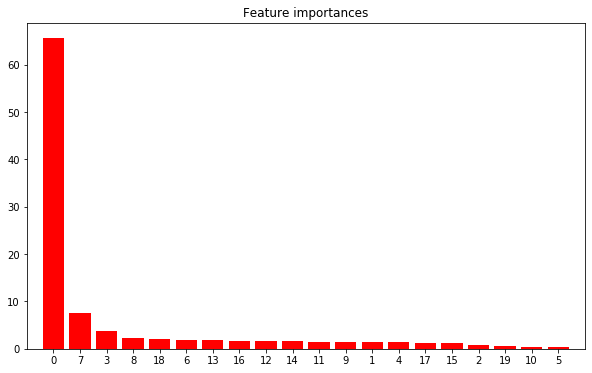

In [88]:
importances = model.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
X = features_train
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

<b>Самый важный признак LTV_days, на втором месте тип линии InternetService_Fiber optic, что тоже логично. Самые же не нужные PaymentMethod_Mailed check и InternetService_No. Можно от них отказаться и попробовать еще больше улучшить модель, а так же передать отделу маркетинга, что эти факторы не влияют на уход клиента. 